<a href="https://colab.research.google.com/github/ArtNatalya/Python_CL_2023/blob/main/%D0%9F%D1%80%D0%BE%D0%B1%D0%B0%20%D0%BF%D0%B5%D1%80%D0%B0%2C%20%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%202!_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd
import random

# Чтение файла
with open('grimm_eng.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Удаление лишних символов и пробелов
cleaned_text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов и переводов строк

# Разделение текста на предложения
sentences = re.split(r'(?<=[.!?]) +', cleaned_text)  # Разделение по точкам, восклицательным и вопросительным знакам

# Создание DataFrame только из предложений
df = pd.DataFrame({'sentence': sentences})

# Перемешивание данных
df = df.sample(frac=1).reset_index(drop=True)

# Разделение на тренировочное и тестовое множества (80% на 20%)
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

# Сохранение датасетов в файлы
train_df.to_csv('train_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)

# Выводим первые 5 предложений для проверки
print("Первые 5 предложений:")
for sentence in sentences[:5]:
    print(sentence)


Первые 5 предложений:
ONE THE FROG KING, OR IRON HEINRICH In the olden days, when wishing still worked, there lived a king whose daughters were all beautiful; but the youngest daughter was so lovely that even the sun, who has seen many things, was struck with wonder every time he shone on her face.
Not far away from the king’s palace there was a deep dark forest, and under a lime tree in the forest there was a well.
In the heat of the day the princess used to go into the forest and sit by the edge of the well, from which a marvellous coolness seemed to flow.
To pass the time she had a golden ball, which she used to throw up in the air and catch.
It was her favourite game.


In [ ]:
# Выводим первые 5 строк тренировочного и тестового множеств для проверки
print("\nПервые 5 строк тренировочного множества:")
print(train_df.head())

print("\nПервые 5 строк тестового множества:")
print(test_df.head())


Первые 5 строк тренировочного множества:
                                            sentence
0                             Have you kidnapped me?
1  The wicked queen leaned in and saw her lying o...
2  The soldier said to him, ‘Will you be my serva...
3  Whenever he had a couple of coins in his pocke...
4                     ‘That’s odd,’ said the knight.

Первые 5 строк тестового множества:
                                               sentence
4644  ‘So I thought maybe we could ask the neighbour...
4645  And slowly she woke up, and then she pushed op...
4646  At that point Hans-my-Hedgehog decided that he...
4647  Only a few seconds later he was standing on th...
4648         The Lord God has forbidden any such thing!


In [ ]:
!pip install transformers
!pip install accelerate -U
!pip install datasets
!pip install pyarrow==8.0.0

import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import load_dataset, Dataset

  Using cached pyarrow-16.1.0-cp310-cp310-manylinux_2_28_x86_64.whl (40.8 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 8.0.0
    Uninstalling pyarrow-8.0.0:
      Successfully uninstalled pyarrow-8.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.1.0 which is incompatible.
  Using cached pyarrow-8.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (29.4 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 16.1.0
    Uninstalling pyarrow-16.1.0:
      Successfully uninstalled pyarrow-16.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sour

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments, TextDataset, DataCollatorForLanguageModeling
from datasets import load_dataset

# Загрузка токенизатора и модели
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Функция для загрузки датасета
def load_dataset(file_path, tokenizer, block_size=128):
    dataset = TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=block_size
    )
    return dataset

# Функция для создания data collator
def create_data_collator(tokenizer):
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=False,
    )
    return data_collator

# Загрузка датасетов
train_dataset = load_dataset('train_dataset.csv', tokenizer)
test_dataset = load_dataset('test_dataset.csv', tokenizer)

# Создание data collator
data_collator = create_data_collator(tokenizer)

# Настройки обучения
training_args = TrainingArguments(
    output_dir="./results",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    eval_steps=400,
    save_steps=800,
    warmup_steps=500,
    prediction_loss_only=True,
)

# Создание тренера
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Обучение модели
trainer.train()

# Сохранение модели
model.save_pretrained('./gpt2_fairy_tales')
tokenizer.save_pretrained('./gpt2_fairy_tales')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


Step,Training Loss
500,3.134200
1000,2.652100
1500,2.429600


('./gpt2_fairy_tales/tokenizer_config.json',
 './gpt2_fairy_tales/special_tokens_map.json',
 './gpt2_fairy_tales/vocab.json',
 './gpt2_fairy_tales/merges.txt',
 './gpt2_fairy_tales/added_tokens.json')

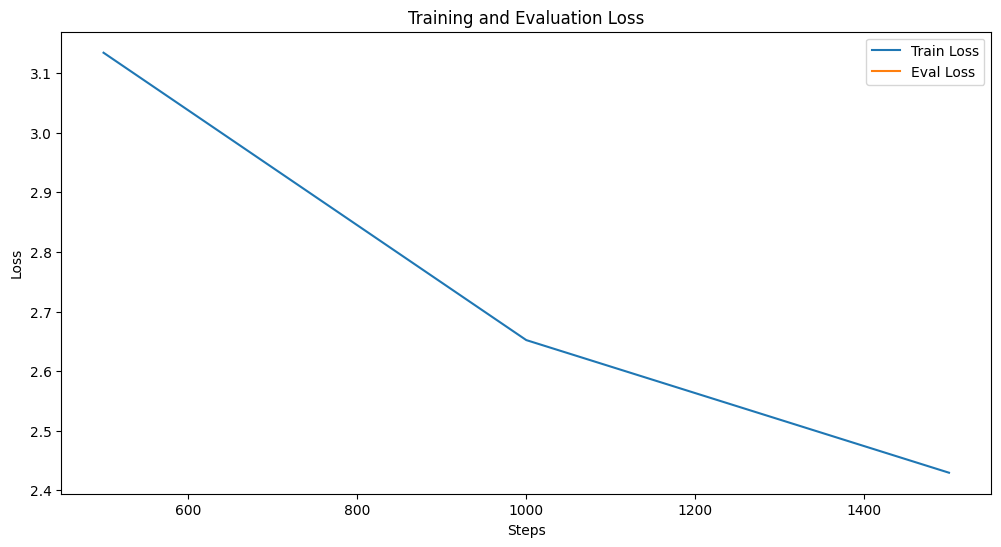

In [ ]:
import matplotlib.pyplot as plt

# Получение истории обучения
train_loss = trainer.state.log_history

# Извлечение значений потерь
steps = []
losses = []
eval_steps = []
eval_losses = []

for log in train_loss:
    if 'loss' in log:
        steps.append(log['step'])
        losses.append(log['loss'])
    if 'eval_loss' in log:
        eval_steps.append(log['step'])
        eval_losses.append(log['eval_loss'])

# Построение графиков потерь
plt.figure(figsize=(12, 6))
plt.plot(steps, losses, label='Train Loss')
plt.plot(eval_steps, eval_losses, label='Eval Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Evaluation Loss')
plt.show()


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Загрузка обученной модели и токенизатора
model_path = './gpt2_fairy_tales'
model = GPT2LMHeadModel.from_pretrained(model_path)
tokenizer = GPT2Tokenizer.from_pretrained(model_path)

# Функция для генерации текста
def generate_text(prompt, max_length=200, num_return_sequences=1):
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    outputs = model.generate(
        inputs,
        max_length=max_length,
        num_return_sequences=num_return_sequences,
        no_repeat_ngram_size=2,
        top_p=0.95,
        top_k=50
    )
    return [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]


In [ ]:
# Пример генерации текста
prompt = "In the deep part of the wood"
generated_texts = generate_text(prompt, max_length=1000, num_return_sequences=1)

for i, text in enumerate(generated_texts):
    print(f"Generated Text {i+1}:\n{text}\n")

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:520: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
